## Importing Libraties

In [3]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Loading Dataset

In [6]:
# Read the car.c45-names file
with open('car.c45-names', 'r') as file:
    lines = file.readlines()

# Extract attribute names
attribute_names = [line.split(':')[0].strip() for line in lines if line.strip() and ':' in line]
attribute_names.append('class')  # Add 'class' as the target variable

print(f"Extracted column names: {attribute_names}")

Extracted column names: ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


In [8]:
df = pd.read_csv('car.data', header=None)

with open('car.data', 'r') as file:
    first_line = file.readline()
    num_columns = len(first_line.split(','))
    print(f"Number of columns: {num_columns}")

Number of columns: 7


In [10]:
df = pd.read_csv('car.data', header=None)

# Assign column names
df.columns = attribute_names

In [11]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Data Analysis and Visualization

### Check for Class Imbalance

In [14]:
df.shape

(1728, 7)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [16]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [19]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col} value counts:\n{df[col].value_counts(normalize=True) * 100}\n")

buying value counts:
buying
vhigh    25.0
high     25.0
med      25.0
low      25.0
Name: proportion, dtype: float64

maint value counts:
maint
vhigh    25.0
high     25.0
med      25.0
low      25.0
Name: proportion, dtype: float64

doors value counts:
doors
2        25.0
3        25.0
4        25.0
5more    25.0
Name: proportion, dtype: float64

persons value counts:
persons
2       33.333333
4       33.333333
more    33.333333
Name: proportion, dtype: float64

lug_boot value counts:
lug_boot
small    33.333333
med      33.333333
big      33.333333
Name: proportion, dtype: float64

safety value counts:
safety
low     33.333333
med     33.333333
high    33.333333
Name: proportion, dtype: float64

class value counts:
class
unacc    70.023148
acc      22.222222
good      3.993056
vgood     3.761574
Name: proportion, dtype: float64



### Checking Distribution

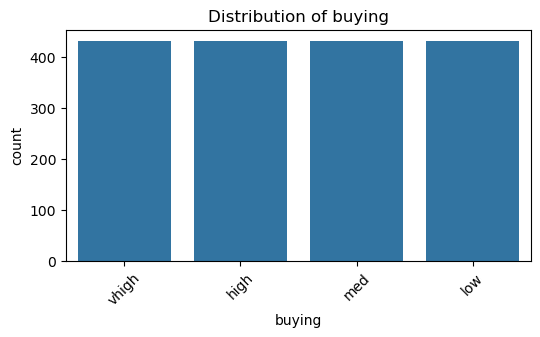

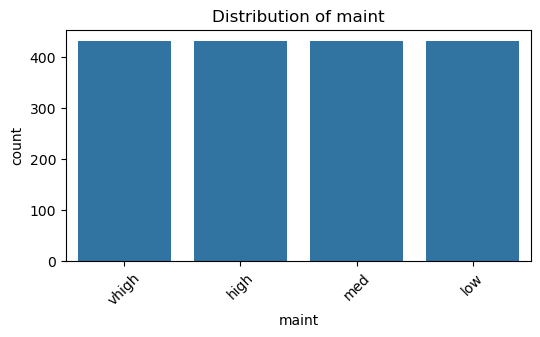

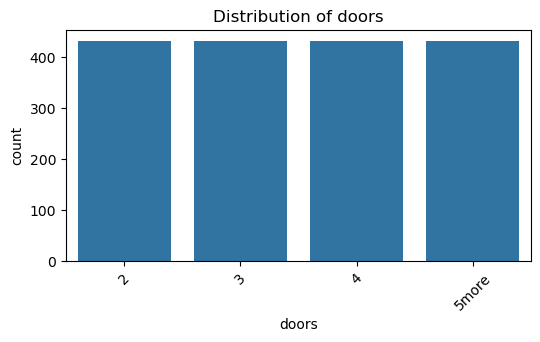

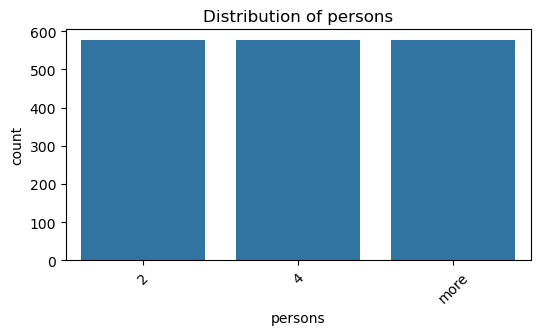

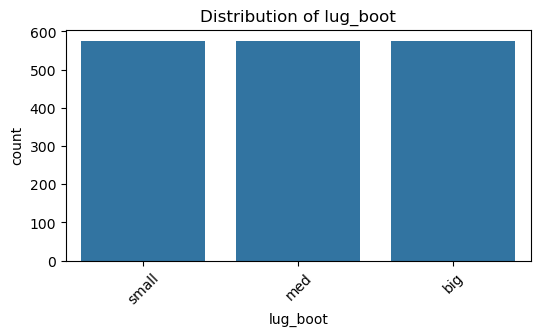

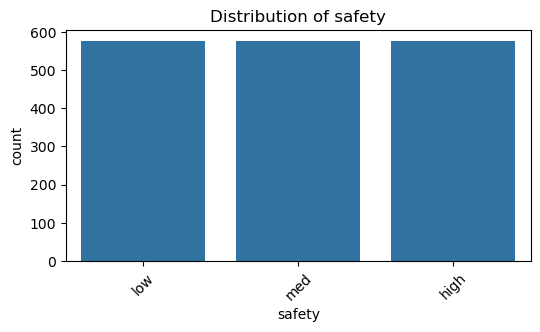

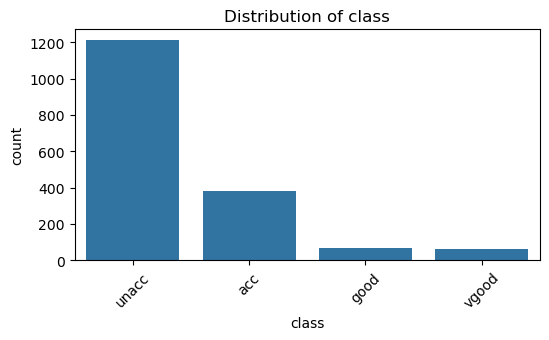

In [24]:
for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [25]:
for col in df.select_dtypes(include='object').columns:
    if col != 'class':
        print(pd.crosstab(df[col], df['class'], normalize='index') * 100)

class         acc       good      unacc     vgood
buying                                           
high    25.000000   0.000000  75.000000  0.000000
low     20.601852  10.648148  59.722222  9.027778
med     26.620370   5.324074  62.037037  6.018519
vhigh   16.666667   0.000000  83.333333  0.000000
class        acc       good      unacc     vgood
maint                                           
high   24.305556   0.000000  72.685185  3.009259
low    21.296296  10.648148  62.037037  6.018519
med    26.620370   5.324074  62.037037  6.018519
vhigh  16.666667   0.000000  83.333333  0.000000
class        acc      good      unacc     vgood
doors                                          
2      18.750000  3.472222  75.462963  2.314815
3      22.916667  4.166667  69.444444  3.472222
4      23.611111  4.166667  67.592593  4.629630
5more  23.611111  4.166667  67.592593  4.629630
class          acc      good       unacc     vgood
persons                                           
2         0.0000

## Label Encoding

In [32]:
le = LabelEncoder()

for column in df.columns:
    df[column] = le.fit_transform(df[column])

In [34]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [36]:
X = df.drop('class', axis=1)
y = df['class']

In [38]:
X

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1723,1,1,3,2,1,2
1724,1,1,3,2,1,0
1725,1,1,3,2,0,1
1726,1,1,3,2,0,2


In [40]:
y

0       2
1       2
2       2
3       2
4       2
       ..
1723    1
1724    3
1725    2
1726    1
1727    3
Name: class, Length: 1728, dtype: int32

### Model Building

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(class_weight='balanced',
    criterion='gini',
    max_depth=6,  # Start with 6–10
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42)

# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [47]:
# Make predictions
y_pred = clf.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred, digits = 4))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0     0.7604    0.6186    0.6822       118
           1     0.2581    0.8421    0.3951        19
           2     1.0000    0.9106    0.9532       358
           3     0.6857    1.0000    0.8136        24

    accuracy                         0.8459       519
   macro avg     0.6760    0.8428    0.7110       519
weighted avg     0.9038    0.8459    0.8647       519

[[ 73  37   0   8]
 [  0  16   0   3]
 [ 23   9 326   0]
 [  0   0   0  24]]


In [49]:
# Train set prediction
y_train_pred = clf.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred))

# Test set prediction
y_test_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))


Train Accuracy: 0.858560794044665
Train Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.72      0.73       266
           1       0.34      0.88      0.49        50
           2       1.00      0.89      0.94       852
           3       0.67      1.00      0.80        41

    accuracy                           0.86      1209
   macro avg       0.69      0.87      0.74      1209
weighted avg       0.91      0.86      0.87      1209

Test Accuracy: 0.8458574181117534
Test Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.62      0.68       118
           1       0.26      0.84      0.40        19
           2       1.00      0.91      0.95       358
           3       0.69      1.00      0.81        24

    accuracy                           0.85       519
   macro avg       0.68      0.84      0.71       519
weighted avg       0.90      0.85      0.86       519



## Decision Tree Visualization

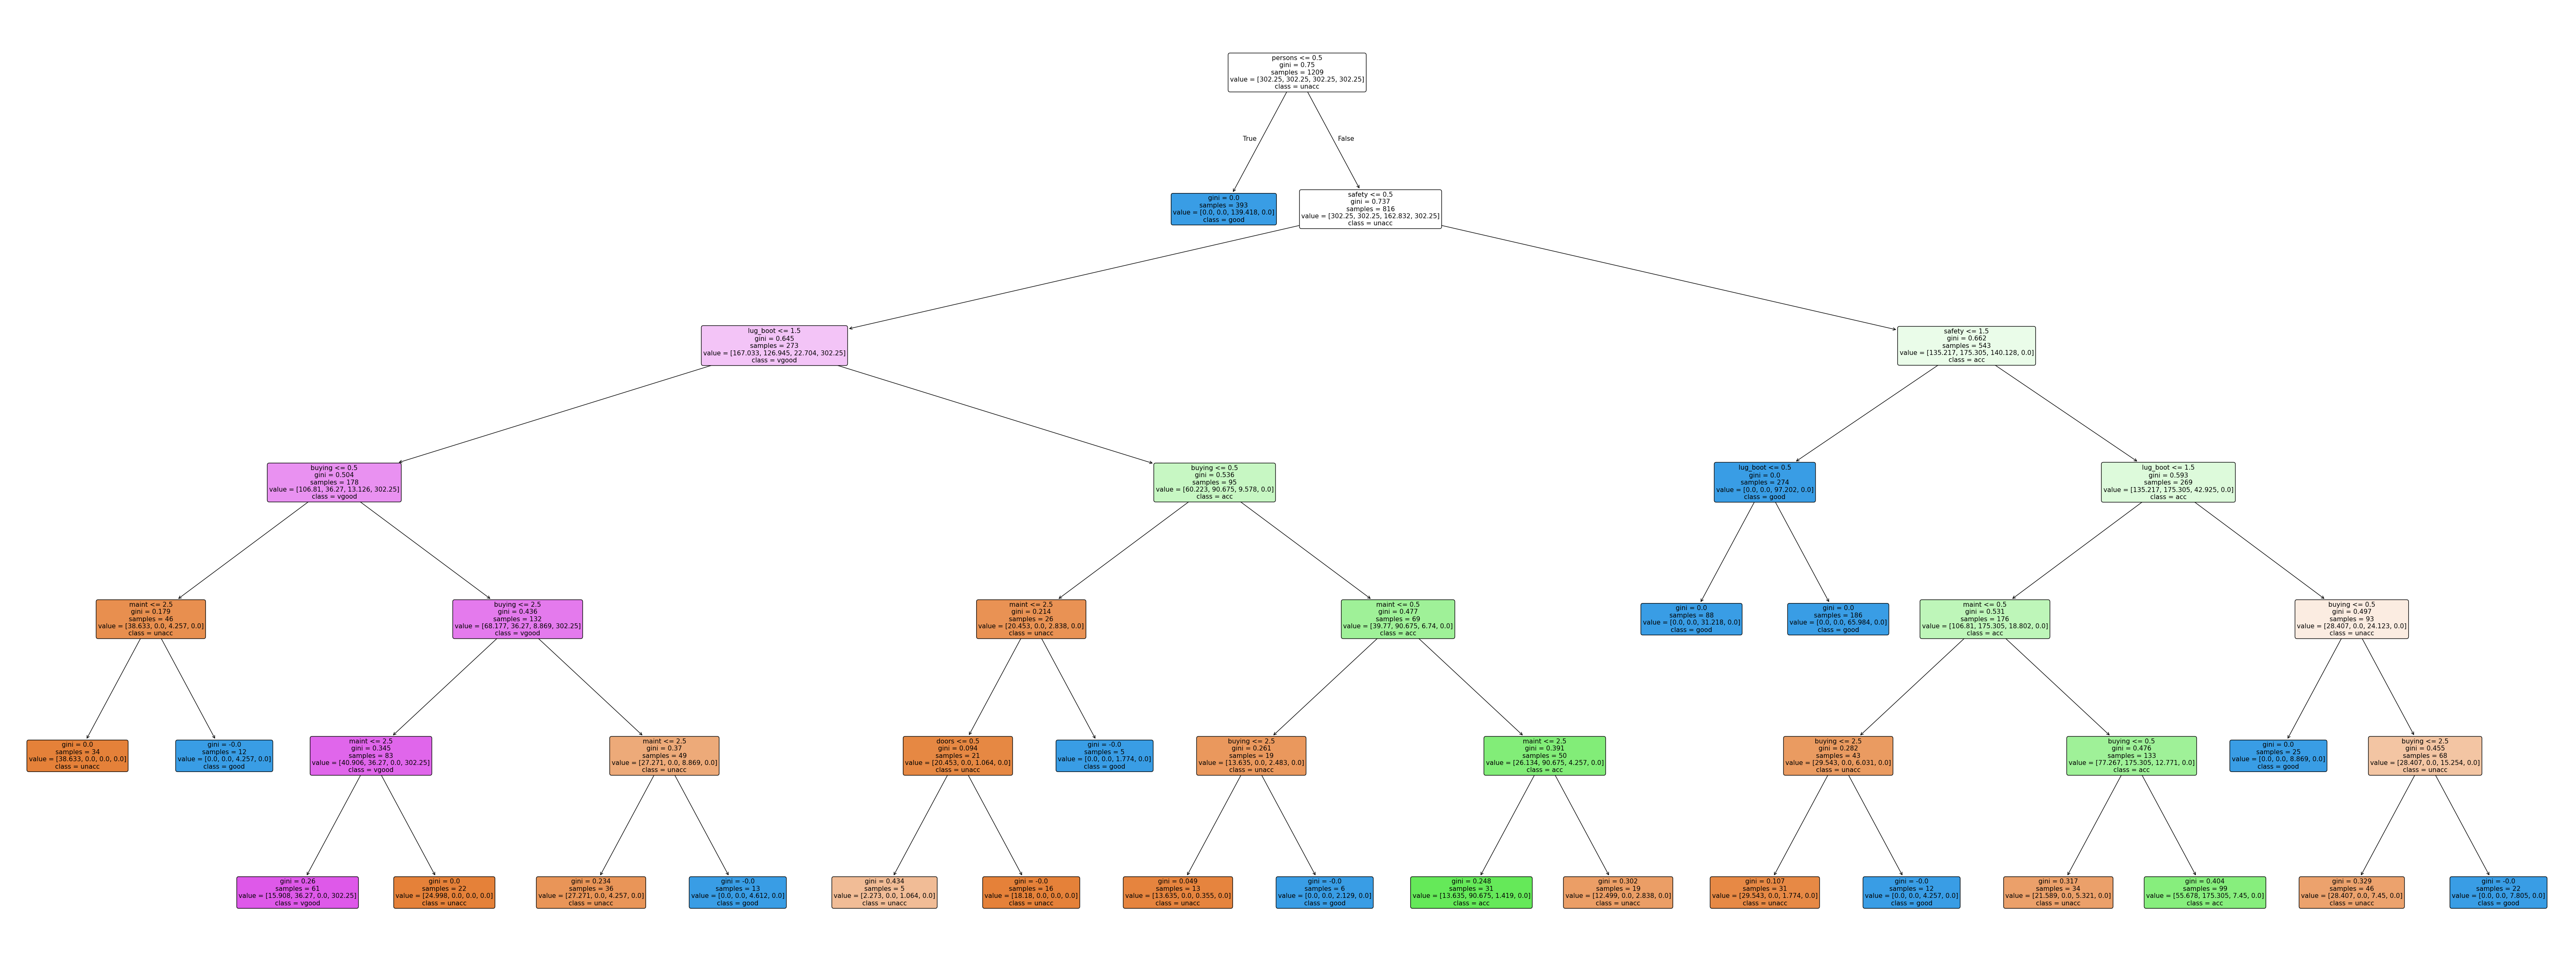

In [53]:
# Convert class labels to strings
class_labels = np.array(['unacc', 'acc', 'good', 'vgood'])

# Plot the decision tree
plt.figure(figsize=(80, 30))
plot_tree(clf, filled=True, feature_names=attribute_names[:-1], class_names=class_labels, rounded=True)
plt.show()